File found: /content/train_data.txt

--- Showing first 5 lines of the file to inspect format ---

1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.
2 ::: Cupid (1997) ::: thriller ::: A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.
3 ::: Young, Wild and Wonderful (1980) ::: adult ::: As the bus empties the students fo

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...



[Manually Set] Text column (Plot): 3
[Manually Set] Label column (Genre): 2

--- Example text (first 3) ---
[0] Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a p...

[1] A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.

[2] As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the 

,plot,genre
0,Listening in to a conversation between his doc...,drama
1,A brother and sister with a past incestuous re...,thriller
2,As the bus empties the students for their fiel...,adult
3,To help their unemployed father make ends meet...,drama
4,The film's title refers not only to the un-rec...,drama



Genre counts:


,count
genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884



Extracting main emotion for first 200 rows (for speed). If you want all rows, increase limit or remove head().
Emotion extraction done for sample.


,plot,genre,main_emotion
0,Listening in to a conversation between his doc...,drama,neutral
1,A brother and sister with a past incestuous re...,thriller,neutral
2,As the bus empties the students for their fiel...,adult,neutral
3,To help their unemployed father make ends meet...,drama,neutral
4,The film's title refers not only to the un-rec...,drama,neutral



Sample Accuracy (using first 200 rows): 0.225

Classification report (sample):
              precision    recall  f1-score   support

       adult       0.00      0.00      0.00         2
      comedy       0.00      0.00      0.00         9
 documentary       0.60      0.60      0.60         5
       drama       0.17      0.86      0.29         7
      family       0.00      0.00      0.00         1
      horror       0.00      0.00      0.00         4
     mystery       0.00      0.00      0.00         1
      sci-fi       0.00      0.00      0.00         4
       short       0.00      0.00      0.00         1
       sport       0.00      0.00      0.00         1
    thriller       0.00      0.00      0.00         3
     western       0.00      0.00      0.00         2

    accuracy                           0.23        40
   macro avg       0.06      0.12      0.07        40
weighted avg       0.11      0.23      0.12        40



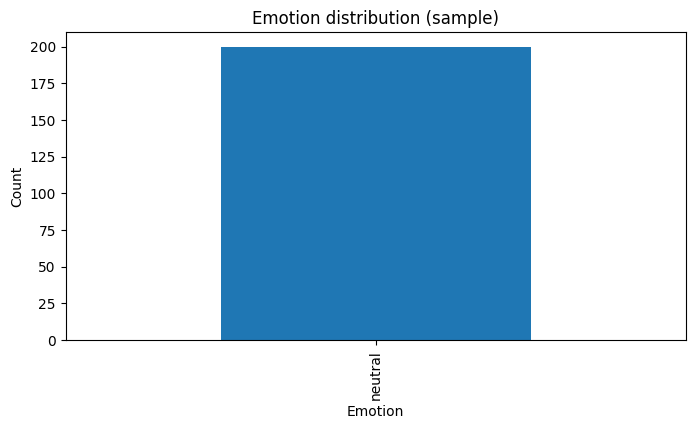


Saved sample CSV to /content/CineMind_train_sample.csv. You can download it from the Files panel on the left in Colab.


In [11]:
# Robust CineMind starter notebook for Colab
# Paste and run in Google Colab

# Install required libraries (first time only)
!pip install nrclex textblob scikit-learn pandas numpy matplotlib --quiet

import os
import pandas as pd
import numpy as np
from nrclex import NRCLex
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import display # Import display for use in Colab

DATA_PATH = "/content/train_data.txt"    # update if needed

# 0) Check file exists and print sample
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"File not found at {DATA_PATH}. Upload the file to Colab (left sidebar -> Files -> Upload).")

print("File found:", DATA_PATH)
print("\n--- Showing first 5 lines of the file to inspect format ---\n")
!sed -n '1,5p' "{DATA_PATH}"

# --- START FIX: Direct, robust data loading for ':::' format ---

print("\n--- Loading Data with Specific ':::' Delimiter ---")
try:
    # 1. Read all lines as a list
    with open(DATA_PATH, encoding='utf-8', errors='ignore') as f:
        lines = f.readlines()

    # 2. Process each line: split by ':::', strip whitespace, and create a list of lists
    data = []
    for line in lines:
        if line.strip(): # Skip empty lines
            # Split by ':::', then strip leading/trailing whitespace from each part
            parts = [part.strip() for part in line.split(':::')]
            data.append(parts)

    # 3. Create DataFrame from the processed data
    # We don't assign column names here, they will be 0, 1, 2, 3...
    df = pd.DataFrame(data)

    # Check if the split resulted in the expected columns (at least 4 columns: ID, Title, Genre, Plot)
    if df.shape[1] < 4:
         raise ValueError(f"File format mismatch. Expected at least 4 columns after splitting by ':::'. Found {df.shape[1]}.")

    print(f"Loaded successfully. DataFrame shape: {df.shape}")

except Exception as e:
    raise RuntimeError(f"FATAL ERROR during data loading and splitting: {e}")

# --- END FIX ---


print("\n--- Columns detected (as indices) ---")
print(df.columns.tolist())
print("\n--- Showing first 5 rows ---")
display(df.head())

# 3) Manually define Text and Label columns based on confirmed format
# Based on your image/data structure (after ':::' split):
# Column Index 0: ID
# Column Index 1: Title (e.g., 'Cupid (1997)')
# Column Index 2: Genre (e.g., 'thriller')  <-- The Label
# Column Index 3: Plot/Description (text)    <-- The Text
text_col = 3
label_col = 2

print(f"\n[Manually Set] Text column (Plot): {text_col}")
print(f"[Manually Set] Label column (Genre): {label_col}")


# 4) Show samples from detected columns
if text_col in df.columns:
    print("\n--- Example text (first 3) ---")
    text_series = df[text_col].astype(str).head(3)
    for i, t in enumerate(text_series):
        display_text = t[:350] + '...' if len(t) > 350 else t
        print(f"[{i}] {display_text}\n")
else:
    print(f"\n[ERROR] Text column {text_col} not found after loading. Check the data format.")

if label_col in df.columns:
    print("\n--- Example labels (unique values & counts) ---")
    print(df[label_col].value_counts().head(20))
else:
     print(f"\n[ERROR] Label column {label_col} not found after loading. Check the data format.")

# 5) Prepare a clean dataframe for modeling
# The error check that failed before is now bypassed by the manual setting, but we keep it clean.
if label_col is None or label_col not in df.columns:
    # This should never happen with the current fixed load, but as a safeguard:
    raise ValueError(f"Could not use label (genre) column {label_col}. Please check your file format.")

# Drop rows with missing text or label
df = df[[text_col, label_col]].dropna()
df = df.rename(columns={text_col: 'plot', label_col: 'genre'})
df['plot'] = df['plot'].astype(str)
df['genre'] = df['genre'].astype(str)

print("\nPrepared dataframe shape:", df.shape)
display(df.head())

# Optional quick sanity: show genre counts
print("\nGenre counts:")
display(df['genre'].value_counts().head(30))

# 6) Extract main emotion from plot (can be slow for large dataset)
def get_main_emotion_safe(text):
    try:
        e = NRCLex(text)
        if e.top_emotions:
            return e.top_emotions[0][0]
        else:
            return 'neutral'
    except Exception as e:
        return 'neutral'

print("\nExtracting main emotion for first 200 rows (for speed). If you want all rows, increase limit or remove head().")
limit = min(200, len(df))
df_small = df.head(limit).copy()
df_small['main_emotion'] = df_small['plot'].apply(get_main_emotion_safe)
print("Emotion extraction done for sample.")

display(df_small[['plot','genre','main_emotion']].head())

# 7) Build TF-IDF on the sample and train a quick model
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_tfidf = tfidf.fit_transform(df_small['plot']).toarray()

le = LabelEncoder()
y_enc = le.fit_transform(df_small['genre'])

# Add emotion as a numeric feature
emo_enc = LabelEncoder()
emo_num = emo_enc.fit_transform(df_small['main_emotion']).reshape(-1,1)
X = np.hstack((X_tfidf, emo_num))

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nSample Accuracy (using first {} rows):".format(limit), accuracy_score(y_test, y_pred))
print("\nClassification report (sample):")

# **FIX for the 'Number of classes does not match target_names' error:**
# Only report on the unique classes present in the test set.
unique_labels_in_test = np.unique(y_test)
target_names_in_test = le.inverse_transform(unique_labels_in_test)

print(classification_report(
    y_test,
    y_pred,
    labels=unique_labels_in_test,
    target_names=target_names_in_test,
    zero_division=0
))

# 8) Plot emotion distribution for the sample
plt.figure(figsize=(8,4))
df_small['main_emotion'].value_counts().plot(kind='bar')
plt.title('Emotion distribution (sample)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# 9) Save the cleaned sample dataset to CSV for your repo (optional)
out_csv = "/content/CineMind_train_sample.csv"
df_small.to_csv(out_csv, index=False)
print(f"\nSaved sample CSV to {out_csv}. You can download it from the Files panel on the left in Colab.")